# <div style="text-align: center; background-color: #0C6A86; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:10px">Predicting Breast Cancer Survival</div>

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1RbihsubyPNkVmvOqAwFkibLPSl97708cog&usqp=CAU)


<p> 
This notebook looks into using various Pyhton-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has breast cancer based on their medcial atrributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation
</p>

## 1. Problem Definition

In a statement,
> Given a clinical parameters about a patient, can we predict whether or not they have breast cancer ?

## 2. Data

The dataset contains information on breast cancer patients, including their Patient_ID, Age, Gender, and expression levels of four proteins (Protein1, Protein2, Protein3, Protein4). The dataset also includes the Breast cancer stage of the patient (Tumor_Stage), Histology (type of cancer), ER, PR, and HER2 status, Surgery_type, Date of Surgery, Date of Last Visit, and Patient Status (Alive/Dead).

This information can be used to analyze the relationship between protein expression levels, cancer stage, and patient outcomes. It can also be used to understand the impact of different types of surgeries on patient survival and to identify potential risk factors for breast cancer progression.

https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awareness


## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has breast cancer during the proof of concept, we'll pursue the project

## 4. Features


## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA plotting libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("breast_cancer_survival.csv")
df.head()
# print(df.shape)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


## Data Exploration (Exploratory data analysis or EDA)

The goal here is to find out more about data and become a subject matter on the dataset you're working with. 

1. What question(s) are you trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. What's kind missing from data and how do you deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add, change or remove features to get more out of your data ?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [4]:
df.Tumour_Stage.value_counts()

II     189
III     81
I       64
Name: Tumour_Stage, dtype: int64

In [5]:
# Fucntion for Visualization
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha='center', fontdict={'family': 'Arial','weight': 'normal','size': 22})


# def diff_colors(columns_sum, color_1, color_2):
    

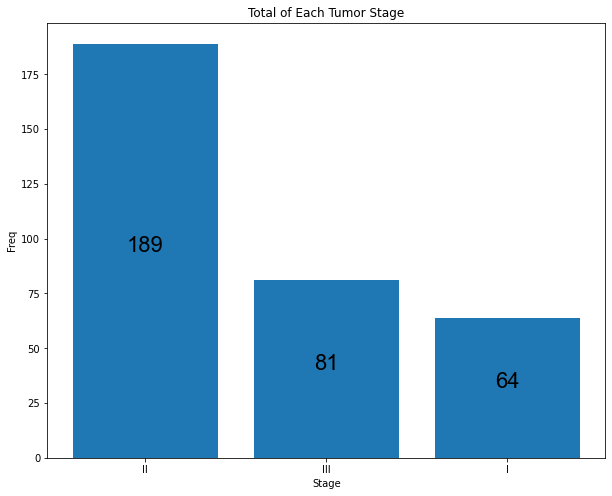

In [6]:
# 1. Total Tumor Stage in Dataset

tumor_stage_total = df.Tumour_Stage.value_counts()
plt.figure(figsize=(10,8))
plt.bar(tumor_stage_total.index, tumor_stage_total.values)
add_labels(tumor_stage_total.index, tumor_stage_total.values)
plt.title("Total of Each Tumor Stage")
plt.xlabel("Stage")
plt.ylabel("Freq")
plt.show()

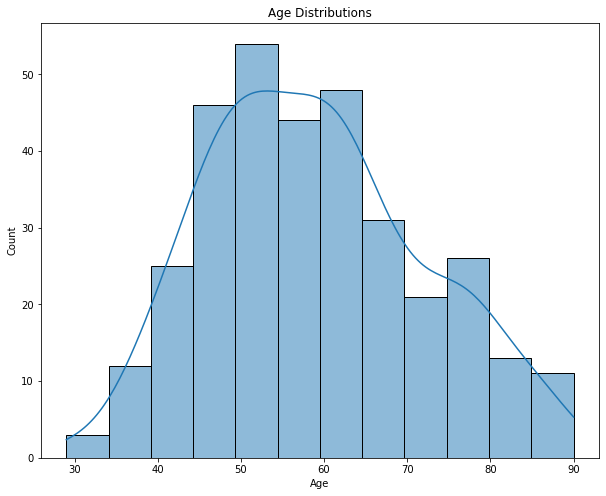

In [7]:
# 2. Distribution of Age in Breast Cancer

plt.figure(figsize=(10,8))
sns.histplot(df, x='Age', kde='True')
plt.title("Age Distributions")
plt.show()

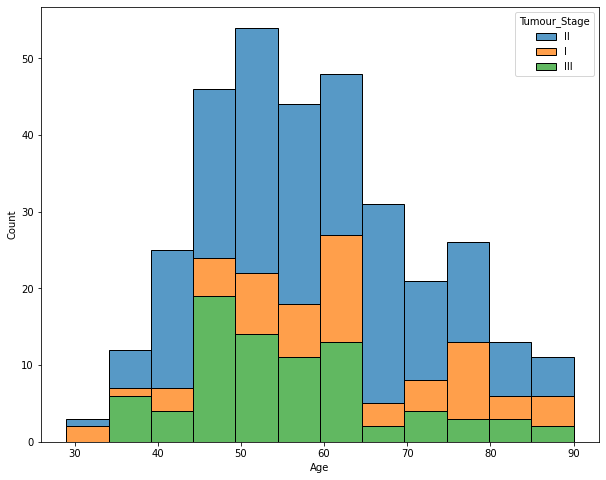

In [8]:
# 3. Distribution of Tumour Stage in every Age

plt.figure(figsize=(10,8))
sns.histplot(df, x='Age', hue='Tumour_Stage', multiple='stack')
plt.show()

In [9]:
df.Gender.value_counts()

FEMALE    330
MALE        4
Name: Gender, dtype: int64

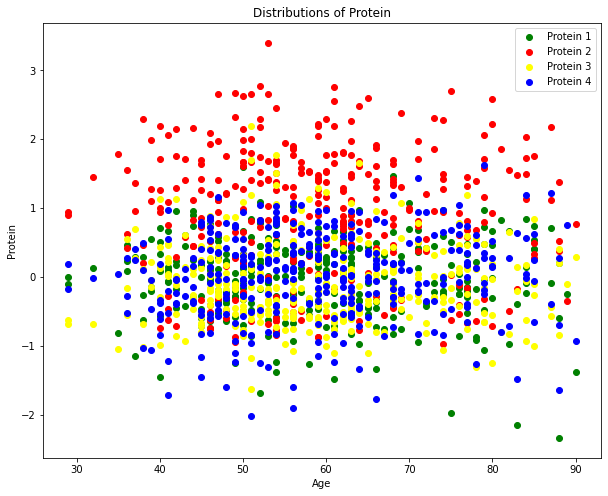

In [10]:
# 4. Distribution Protein I, Protein II, Protein III, Protein IV

plt.figure(figsize=(10,8))
plt.scatter(df.Age, df.Protein1, c='green')
plt.scatter(df.Age, df.Protein2, c='red')
plt.scatter(df.Age, df.Protein3, c='yellow')
plt.scatter(df.Age, df.Protein4, c='blue')

plt.title("Distributions of Protein")
plt.xlabel("Age")
plt.ylabel("Protein")
plt.legend(["Protein 1", "Protein 2", "Protein 3", "Protein 4"])

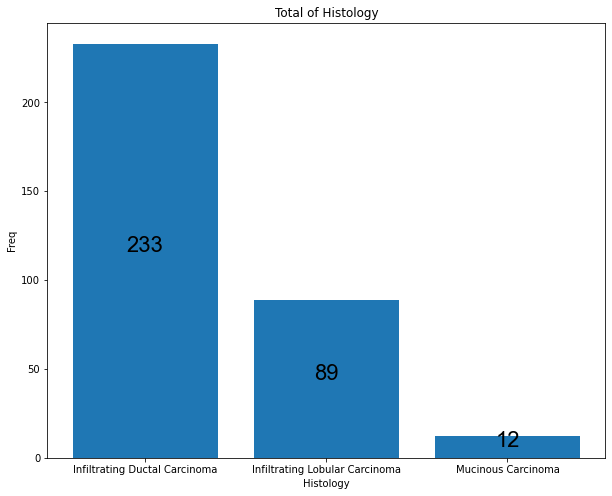

In [11]:
# 5. Total Tumor Stage in Dataset

historology_total = df.Histology.value_counts()
plt.figure(figsize=(10,8))
plt.bar(historology_total.index, historology_total.values)
add_labels(historology_total.index, historology_total.values)
plt.title("Total of Histology")
plt.xlabel("Histology")
plt.ylabel("Freq")
plt.show()

Text(0, 0.5, 'Freq')

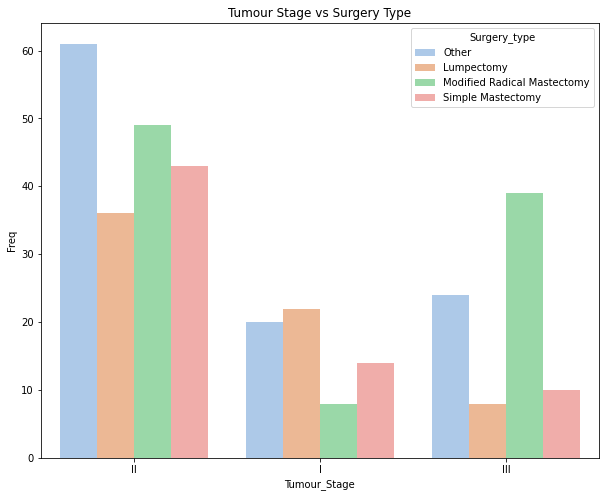

In [12]:
# 6. Distribution Tumour Stage to Surgery type
plt.figure(figsize=(10,8))
sns.countplot(x='Tumour_Stage', hue='Surgery_type', data=df, palette='pastel', saturation=0.7, )
plt.title("Tumour Stage vs Surgery Type")
plt.ylabel("Freq")
# plt.bar_label()

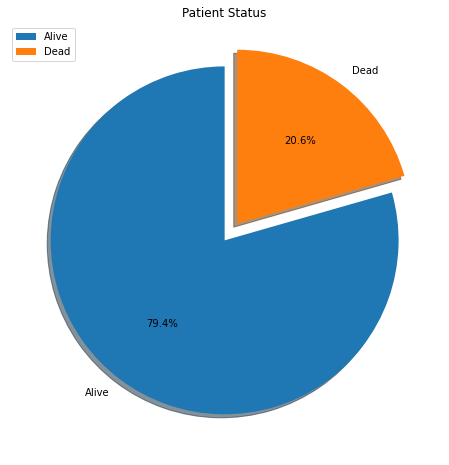

In [13]:
# 7. Distribution Patient Status
plt.figure(figsize=(10,8))

patient_status = df.Patient_Status.value_counts()
plt.pie(x=patient_status.values, labels=patient_status.index, shadow=True, explode=[0, 0.12], autopct = '%1.1f%%',
       startangle=90)
plt.legend()
plt.title("Patient Status")
plt.show()

In [14]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


## Machine Learning Tools

In [15]:
%matplotlib inline

# Machine Learning Tools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Tranformation data using Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# to take care missing value
from sklearn.impute import SimpleImputer

# To take care categorical variable
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.metrics import precision_score, accuracy_score, classification_report, recall_score, f1_score, confusion_matrix

In [16]:
df_temp = df.copy()
df_temp.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [17]:
df_temp=df_temp.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)
df_temp

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive


In [18]:
df_temp_clean = df_temp.dropna()
df_temp_clean

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive


In [19]:
cat_col = df_temp_clean.select_dtypes(include='object').columns.to_list()
cat_col

['Gender',
 'Tumour_Stage',
 'Histology',
 'ER status',
 'PR status',
 'HER2 status',
 'Surgery_type',
 'Patient_Status']

In [20]:
num_col = df_temp_clean.select_dtypes(exclude='object').columns.to_list()
num_col

['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']

In [21]:
df_temp_clean.Patient_Status = np.where(df_temp_clean.Patient_Status == "Alive", 1, 0)
df_temp_clean

C:\Users\bayu\AppData\Local\Temp\ipykernel_23676\4266204056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_clean.Patient_Status = np.where(df_temp_clean.Patient_Status == "Alive", 1, 0)


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,0
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,1
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,1
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,1
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,0
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,1


In [22]:
cat_features = ['Gender',
 'Tumour_Stage',
 'Histology',
 'ER status',
 'PR status',
 'HER2 status',
 'Surgery_type']
num_col = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaller', StandardScaler())
])

full_pipeline = ColumnTransformer(
    transformers=[("num", num_pipeline, num_col),
                 ("cat", OneHotEncoder(), cat_features)]
)

In [23]:
X = df_temp_clean.drop('Patient_Status', axis=1)
y = df_temp_clean.Patient_Status

In [24]:
X

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy
...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy


In [25]:
y

0      1
1      0
2      1
3      1
4      1
      ..
329    1
330    1
331    0
332    1
333    0
Name: Patient_Status, Length: 321, dtype: int32

In [26]:
transformed_X = full_pipeline.fit_transform(X)
transformed_X

array([[-1.30717407,  1.79364996,  1.31624535, ...,  0.        ,
         1.        ,  0.        ],
       [-0.37764951,  0.0485116 ,  0.46865067, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.3194939 , -0.90970596,  0.89123685, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.37764951,  1.42954817,  0.75745826, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.17155808,  1.83019937,  0.51995998, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55187504,  0.57317432,  0.49023141, ...,  1.        ,
         0.        ,  0.        ]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=106)

In [28]:
print(X_train.shape, y_train.shape), print(X_test.shape, y_test.shape)

(240, 12) (240,)
(81, 12) (81,)


(None, None)

In [29]:
pipeline_model = {
    "log_reg": make_pipeline(full_pipeline, LogisticRegression()),
    "knclassifier": make_pipeline(full_pipeline, KNeighborsClassifier()),
    "random_forest": make_pipeline(full_pipeline, RandomForestClassifier())
}

In [30]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [32]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
grid = {
    "log_reg":{'logisticregression__max_iter':[10,20,30]},
    "knclassifier":{'kneighborsclassifier__leaf_size':[10,20,30]},
    "random_forest":{'randomforestclassifier__n_estimators':[10,20,30]},
}

In [34]:
fit_models = {}
for algo, pipeline in pipeline_model.items():
    # 4.1 Create a Grid Search CV instance
    model = GridSearchCV(pipeline, grid[algo], cv=10, n_jobs=-1)
    # 4.2 Fit the model
    model.fit(X_train, y_train)
#     model.best_estimator_
    # 4.3 Save it to the fit models dictionary
    fit_models[algo] = model
    print(algo, 'model has been fit.')

C:\Users\bayu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


log_reg model has been fit.
knclassifier model has been fit.
random_forest model has been fit.


In [35]:
fit_models

{'log_reg': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('columntransformer',
                                         ColumnTransformer(transformers=[('num',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('std_scaller',
                                                                                           StandardScaler())]),
                                                                          ['Age',
                                                                           'Protein1',
                                                                           'Protein2',
                                                                           'Protein3',
                                    

In [36]:
fit_models['log_reg'].predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
fit_models['knclassifier'].predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print('Precision for', algo, 'is', precision_score(y_test, yhat))
    print('Accuracy for', algo, 'is', accuracy_score(y_test, yhat))
    print('F1-Score for', algo, 'is', f1_score(y_test, yhat,))
    print('Recall Score for', algo, 'is', recall_score(y_test, yhat))
    print('Clasification Report for', algo, 'is \n', classification_report(y_test, yhat, target_names=['Alive','Dead']))
    print("\n")

Precision for log_reg is 0.8641975308641975
Accuracy for log_reg is 0.8641975308641975
F1-Score for log_reg is 0.9271523178807948
Recall Score for log_reg is 1.0
Clasification Report for log_reg is 
               precision    recall  f1-score   support

       Alive       0.00      0.00      0.00        11
        Dead       0.86      1.00      0.93        70

    accuracy                           0.86        81
   macro avg       0.43      0.50      0.46        81
weighted avg       0.75      0.86      0.80        81



Precision for knclassifier is 0.8571428571428571
Accuracy for knclassifier is 0.7530864197530864
F1-Score for knclassifier is 0.8571428571428571
Recall Score for knclassifier is 0.8571428571428571
Clasification Report for knclassifier is 
               precision    recall  f1-score   support

       Alive       0.09      0.09      0.09        11
        Dead       0.86      0.86      0.86        70

    accuracy                           0.75        81
   macro avg 

C:\Users\bayu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bayu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bayu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
for algo, model in fit_models.items():
#     model = mode
    yhat = model.predict(X_test)
    print('Confusion Matrix for', algo, 'is \n', confusion_matrix(y_test, yhat))

Confusion Matrix for log_reg is 
 [[ 0 11]
 [ 0 70]]
Confusion Matrix for knclassifier is 
 [[ 1 10]
 [10 60]]
Confusion Matrix for random_forest is 
 [[ 0 11]
 [ 1 69]]


In [40]:
fit_models['log_reg'].best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaller',
                                                                   StandardScaler())]),
                                                  ['Age', 'Protein1',
                                                   'Protein2', 'Protein3',
                                                   'Protein4']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Tumour_Stage',
                                                   'Histology', 'ER status',
                                                   'PR status', 'HER2 status',
                                      